### Convolutional Neural Networks (CNNs / ConvNets)

ConvNet architectures make the explicit assumption that the inputs are images. Each Layer in CNN accepts an input 3D volume and transforms it to an output 3D volume through a differentiable function.

Inputs : MNIST has images of width 28, height 28, and with 1 color channels Grey. In our case, number of filters is 32, size of filter is (3,3) and shape is (28,28,1).

Convolutional Layer : This layer will compute the output of neurons that are connected to local regions in the input, each computing a dot product between their weights and a small region they are connected to in the input volume.

Activation Layer : This layer will apply an elementwise activation function. We used ReLU as Activation Layer, it the most popular one and eliminates vanishing gradient problem. ReLU function is f(x) = max(0, x), where x is the input. It sets all negative values in the matrix ‘x’ to 0 and keeps all the other values constant.  

Pooling Layer : This layer will perform a downsampling operation along the spatial dimensions (width, height).It also reduces the number of parameters to learn, reducing the training time.

Fully-Connected Layer (Dense layers ) : This layer will compute the final class scores, resulting in volume of size [1x1x10], where each of the 10 numbers correspond to a class score. The last dense layer should be equal to the number of classes we want to predict as this is the output layer.

BatchNormalization : This layer normalizes the matrix after it is been through a convolution layer so that the scale of each dimension remains the same. It reduces the training time significantly. It is used between Convolutional Layer and Activation Layer.

Dropout : Method used to reduce overfitting. It forces the model to learn multiple independent representations of the same data by randomly disabling neurons in the learning phase.   

Softmax Activation Layer : Softmax activation enables us to calculate the output based on the probabilities. Each class is assigned a probability and the class with the maximum probability is the model’s output for the input.

categorical_crossentropy : calculates the error rate between the predicted value and the original value. Categorical is used because there are 10 classes to predict from. If there were 2 classes, we would have used binary_crossentropy.

Adam Optimizer : The optimizer is responsible for updating the weights of the neurons via backpropagation. It calculates the derivative of the loss function with respect to each weight and subtracts it from the weight.
    
Tips
    1. Final Total params should be as less as possible.
    2. Use default stride of 1 or 2,3..for larger ones.
    3. Padding not required.

In [2]:
#Importing Generic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time

#Importing Keras Libraries
from keras.models import Sequential
from keras import backend as K
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import History 
history = History()

#Importing sklearn Libraries
from sklearn import grid_search

# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

# There are 10 digits : 0..9
number_of_classes = 10

Using TensorFlow backend.
/Users/ram/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/ram/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
#Splitting data into Train and Test Sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Printing shape of the data set\
# input image dimensions : rows * cols = 28,28
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

('X_train original shape', (60000, 28, 28))
('y_train original shape', (60000,))
('X_test original shape', (10000, 28, 28))
('y_test original shape', (10000,))


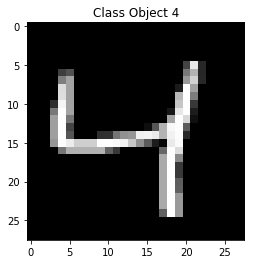

In [6]:
#Displaying a sample training image
plt.imshow(X_train[2], cmap='gray')
plt.title('Class Object '+ str(y_train[2]))

In [8]:
#Normalization and reshaping of input
#As images are in grayscale, the number of channels is 1. For color images, it's be 3 (R, G, B).
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Rescaling so that each pixel lies in the interval [0, 1] instead of [0, 255]
X_train/=255
X_test/=255

#After normalizing the shape of data\n,
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

('X_train original shape', (60000, 28, 28, 1))
('y_train original shape', (60000,))
('X_test original shape', (10000, 28, 28, 1))
('y_test original shape', (10000,))


In [10]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

#Before one-hot encoding
print y_train[2]

#After one-hot encoding
print Y_train[2]

4
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


In [11]:
def create_model ():
    
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
    BatchNormalization(axis=-1)
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    BatchNormalization(axis=-1)
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
  
    model.add(Conv2D(64, (3, 3)))
    BatchNormalization(axis=-1)
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    BatchNormalization(axis=-1)
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
        
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    BatchNormalization()
    model.add(Dense(512))
    model.add(Activation('relu'))
    BatchNormalization()
    model.add(Dropout(0.2))
    model.add(Dense(10))
    
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    model.summary()
    return model

In [12]:
#Data Augmentation : Creating batches of images and train on them.
# Tips for Data Augmentation : https://machinelearningmastery.com/image-augmentation-deep-learning-keras/
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
train_generator = gen.flow(X_train, Y_train, batch_size=64)

test_gen = ImageDataGenerator()
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [13]:
#Creating model and fitting
model = create_model()
model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=8,
                    validation_data=test_generator, validation_steps=10000//64)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
__________

In [17]:
#Evaluating Model,
score = model.evaluate(X_test, Y_test)
print('Test accuracy: ', score[1])

 9952/10000 [============================>.] - ETA: 0s('Test accuracy: ', 0.029497148081474005)
('Test accuracy: ', 0.99299999999999999)


In [18]:
#Making Predictions, Comparing Actuals to Predictions and writing to a file
predictions = model.predict_classes(X_test)
predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./op_mnist_cnn.csv', index=False)

#Metrics
#Refer : https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/

 9952/10000 [============================>.] - ETA: 0s